<a href="https://colab.research.google.com/github/sundeepgarg/LR_Delivery_Time_Prediction/blob/main/LR_Delivery_Time_Estimation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the file porter_data_1.csv
import pandas as pd
df = pd.read_csv('/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/linear regression/Delivery_Starter/porter_data_1.csv')
print(df.head())
df.info()

   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2 

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# Convert datetime columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Check the data types to confirm
print("\nAfter conversion:")
print(df[['created_at', 'actual_delivery_time']].dtypes)



After conversion:
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical columns to 'category' type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

# Check the updated data types
print("\nCategorical columns after conversion:")
print(df[['market_id', 'store_primary_category', 'order_protocol']].dtypes)


Categorical columns after conversion:
market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate delivery duration in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Check first 3 entries to verify
print("\nDelivery time check:")
print(df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head(3))



Delivery time check:
           created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract hour and day of week from timestamp
df['order_hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek  # Monday=0 to Sunday=6

# Create weekend flag (simple version)
df['isWeekend'] = (df['day_of_week'] >= 5).astype(int)  # 1=weekend, 0=weekday

# Optional: Convert to categorical type if preferred
df['isWeekend'] = df['isWeekend'].astype('category')

# Drop original timestamp columns (keep new features)
df = df.drop(columns=['created_at', 'actual_delivery_time'])

# Quick verification
print("\nNew features check:")
print(df[['order_hour', 'day_of_week', 'isWeekend']].sample(3, random_state=1))
print("\nColumns after drop:", df.columns.tolist())


New features check:
        order_hour  day_of_week isWeekend
6723             1            4         0
94082            4            5         1
164597           0            6         1

Columns after drop: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'order_hour', 'day_of_week', 'isWeekend']


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)

# Separate target and features
y = df['delivery_time_minutes']  # Target: delivery duration
X = df.drop(columns=['delivery_time_minutes'])  # All other columns as features

# Simple verification
print("\nShape check:")
print(f"Features shape: {X.shape}")
print(f"Target shape:   {y.shape}")

print("\nSample features:")
print(X.sample(3, random_state=1))  # Show random rows


Shape check:
Features shape: (175777, 15)
Target shape:   (175777,)

Sample features:
       market_id store_primary_category order_protocol  total_items  subtotal  \
6723         5.0                     72            2.0            1       850   
94082        2.0                      2            5.0            2      2000   
164597       5.0                     24            1.0            3      1407   

        num_distinct_items  min_item_price  max_item_price  \
6723                     1             850             850   
94082                    2             500            1500   
164597                   3             225             787   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
6723                     19.0                12.0                      13.0   
94082                    68.0                73.0                     118.0   
164597                   11.0                 7.0                       7.0   

        distance  orde

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets


# Split into train-test (80-20 split)
from sklearn.model_selection import train_test_split

# Using common random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Answer to everything
)

# Quick sanity checks
print(f"\nTraining set: {X_train.shape[0]} records")
print(f"Test set:     {X_test.shape[0]} records")

# Show random training sample
print("\nTraining sample:")
print(X_train.sample(3, random_state=1))
print(y_train.sample(3, random_state=1))



Training set: 140621 records
Test set:     35156 records

Training sample:
       market_id store_primary_category order_protocol  total_items  subtotal  \
678          2.0                      7            3.0            2      3920   
170736       1.0                     45            4.0            6      3805   
4240         1.0                      4            1.0            1      1200   

        num_distinct_items  min_item_price  max_item_price  \
678                      2            1525            2195   
170736                   5             145            1307   
4240                     1            1200            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
678                      53.0                53.0                     110.0   
170736                    0.0                 0.0                       0.0   
4240                     47.0                45.0                      46.0   

        distance  order_hour  day

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

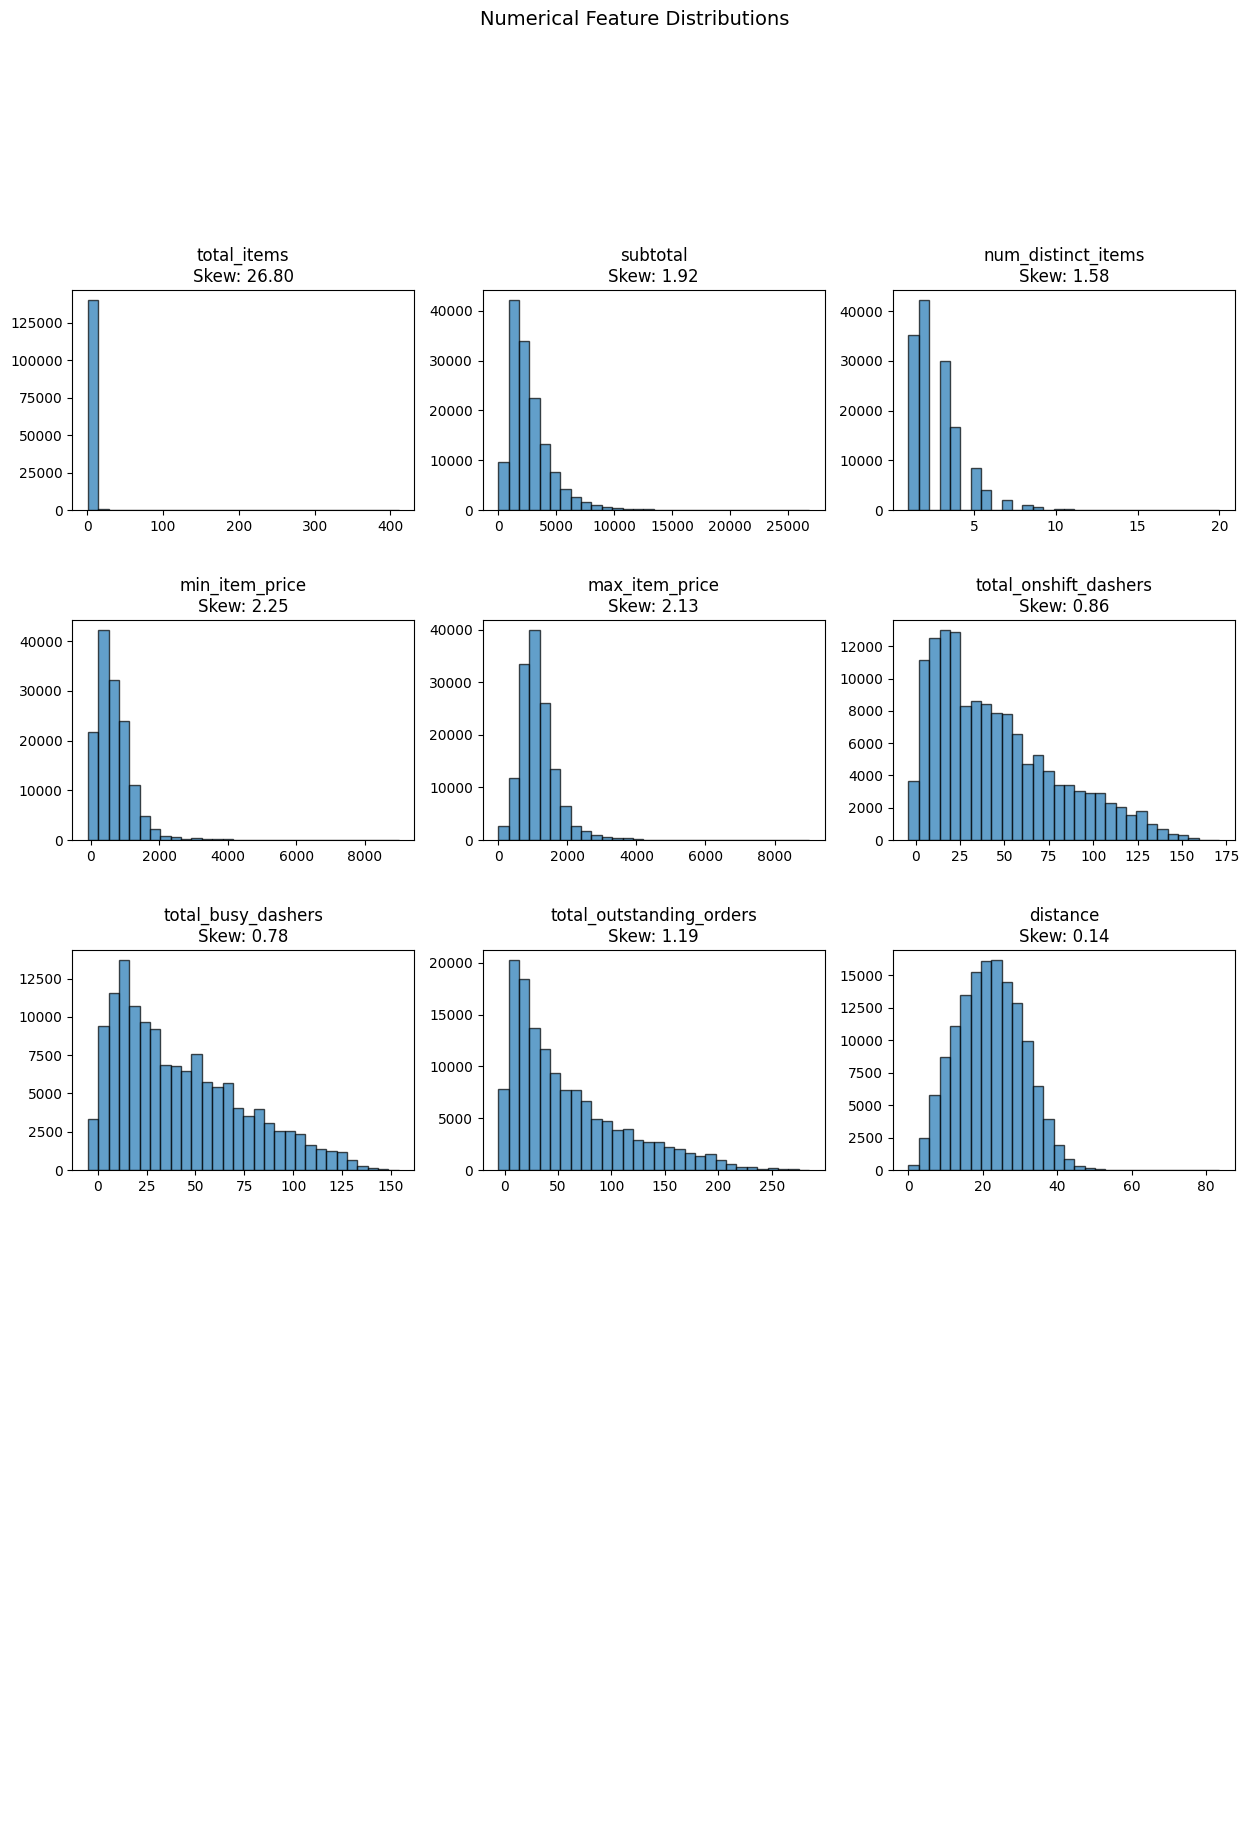

In [ ]:
# Plot distributions for all numerical columns

# Identify numerical columns (exclude categoricals)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up plot grid
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

# Plot histograms for all numerical features
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)  # 5 rows x 3 cols grid
    plt.hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"{col}\nSkew: {X_train[col].skew():.2f}")
    plt.xlabel('')

# Hide empty subplots if any
for j in range(i+1, 16):  # FIXED: Removed extra parenthesis here
    plt.subplot(5, 3, j)
    plt.axis('off')

plt.suptitle('Numerical Feature Distributions', y=1.02, fontsize=14)
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

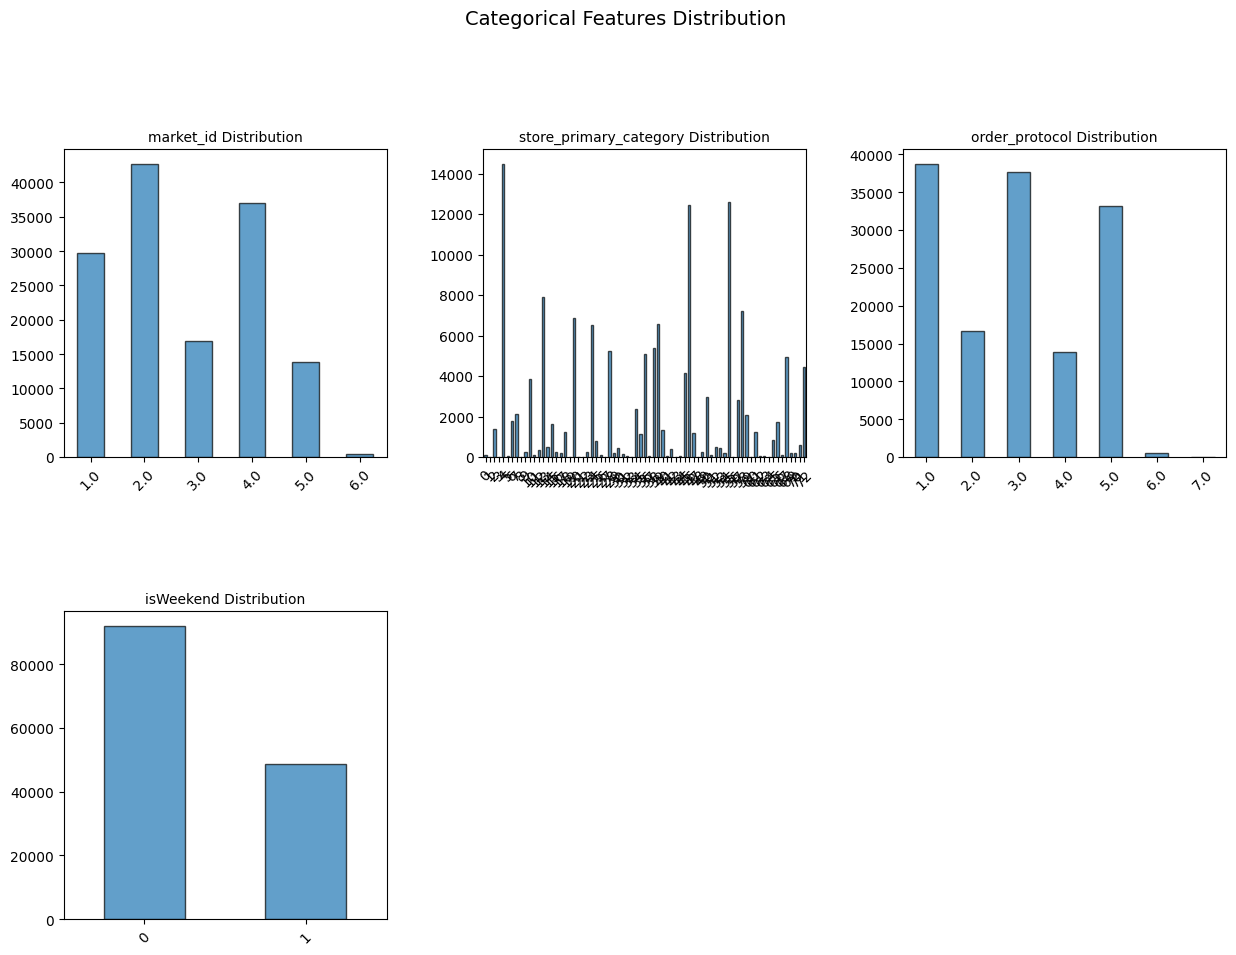

In [ ]:
# Distribution of categorical columns

# Check distribution of categorical features
import matplotlib.pyplot as plt

# Identify categorical columns (including low cardinality numerical)
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Add numerical columns with fewer than 20 unique values
for col in X_train.select_dtypes(include=['int64', 'float64']):
    if X_train[col].nunique() < 20 and col not in cat_cols:
        cat_cols.append(col)

if not cat_cols:
    print("No categorical columns found.")
else:
    # Set up plot grid
    n_cols = 3
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Calculate rows needed
    plt.figure(figsize=(15, 5 * n_rows))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    # Plot each categorical feature
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        X_train[col].value_counts().sort_index().plot(kind='bar', alpha=0.7, edgecolor='k')
        plt.title(f"{col} Distribution", fontsize=10)
        plt.xticks(rotation=45)
        plt.xlabel('')

    plt.suptitle("Categorical Features Distribution", y=1.02, fontsize=14)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

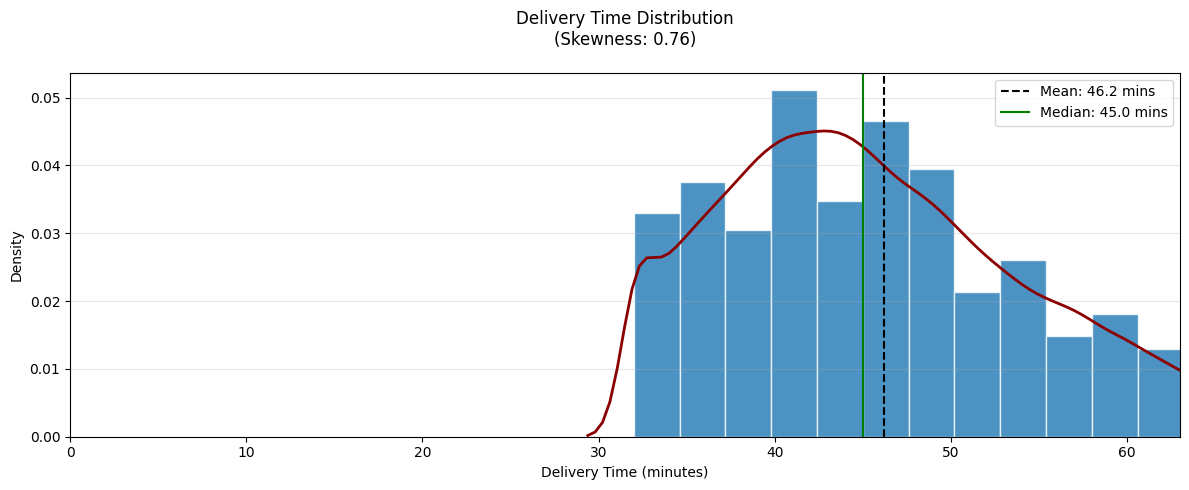

In [ ]:
# Distribution of time_taken

# Plot target distribution
plt.figure(figsize=(12, 5))

# Histogram with density line
plt.hist(y_train, bins=30, color='#1f77b4', edgecolor='white', alpha=0.8, density=True)
sns.kdeplot(y_train, color='darkred', linewidth=2)

# Add distribution stats
mean_val = y_train.mean()
median_val = y_train.median()
plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean: {mean_val:.1f} mins')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f} mins')

# Formatting
plt.title(f"Delivery Time Distribution\n(Skewness: {y_train.skew():.2f})", pad=20)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Show some outlier values if needed
plt.xlim(0, y_train.quantile(0.95))  # Trim extreme outliers for better visibility

plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

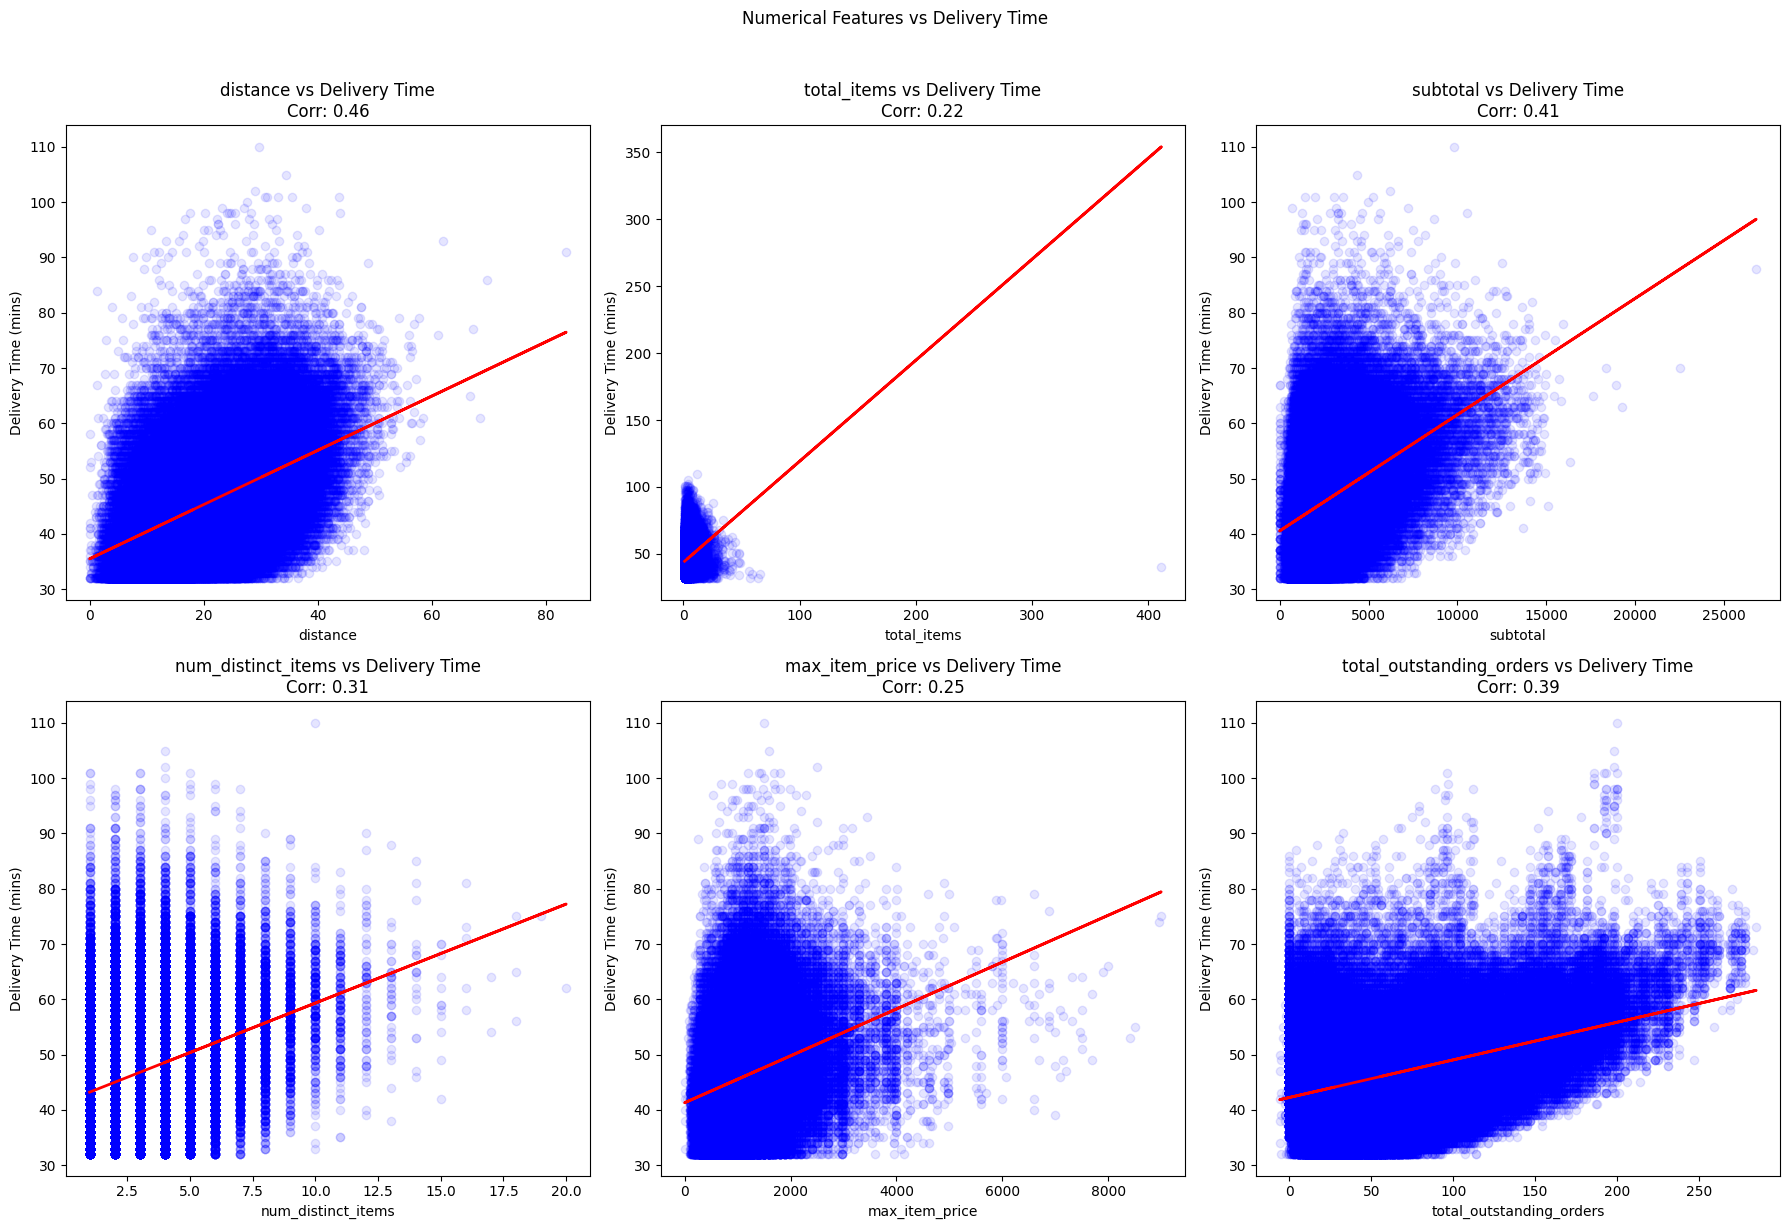

<ipython-input-14-3d0a41fdaa68>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['order_hour'], y=y_train,


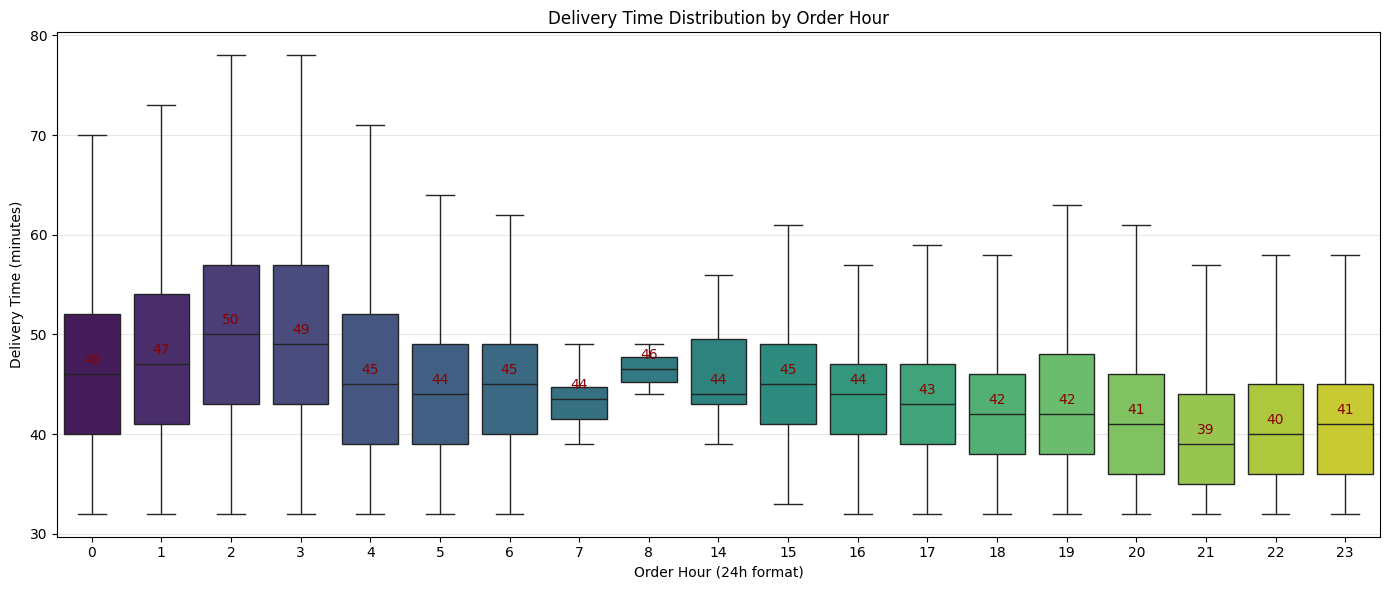

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features


# Show the distribution of time_taken for different hours

# Relationships between features and delivery time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Part 1: Scatter plots for numerical features ---
# Select top 6 numerical features (modify as needed)
num_features = ['distance', 'total_items', 'subtotal',
                'num_distinct_items', 'max_item_price',
                'total_outstanding_orders']

# Set up plot grid
plt.figure(figsize=(18, 12))
plt.suptitle("Numerical Features vs Delivery Time", y=1.02)

for i, feat in enumerate(num_features, 1):
    plt.subplot(2, 3, i)

    # Scatter plot with transparency
    plt.scatter(X_train[feat], y_train, alpha=0.1, color='blue')

    # Add trend line
    z = np.polyfit(X_train[feat], y_train, 1)
    plt.plot(X_train[feat], np.poly1d(z)(X_train[feat]),
             color='red', linewidth=2)

    plt.title(f"{feat} vs Delivery Time\nCorr: {X_train[feat].corr(y_train):.2f}")
    plt.xlabel(feat)
    plt.ylabel('Delivery Time (mins)')

plt.tight_layout()
plt.show()

# --- Part 2: Time distribution by hour ---
plt.figure(figsize=(14, 6))

# Boxplot version
sns.boxplot(x=X_train['order_hour'], y=y_train,
            palette='viridis', showfliers=False)
plt.title("Delivery Time Distribution by Order Hour")
plt.xlabel("Order Hour (24h format)")
plt.ylabel("Delivery Time (minutes)")
plt.grid(axis='y', alpha=0.3)

# Add median labels
hours = sorted(X_train['order_hour'].unique())
medians = [y_train[X_train['order_hour'] == h].median() for h in hours]
for i, m in enumerate(medians):
    plt.text(i, m+1, f'{m:.0f}', ha='center', color='darkred')

plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

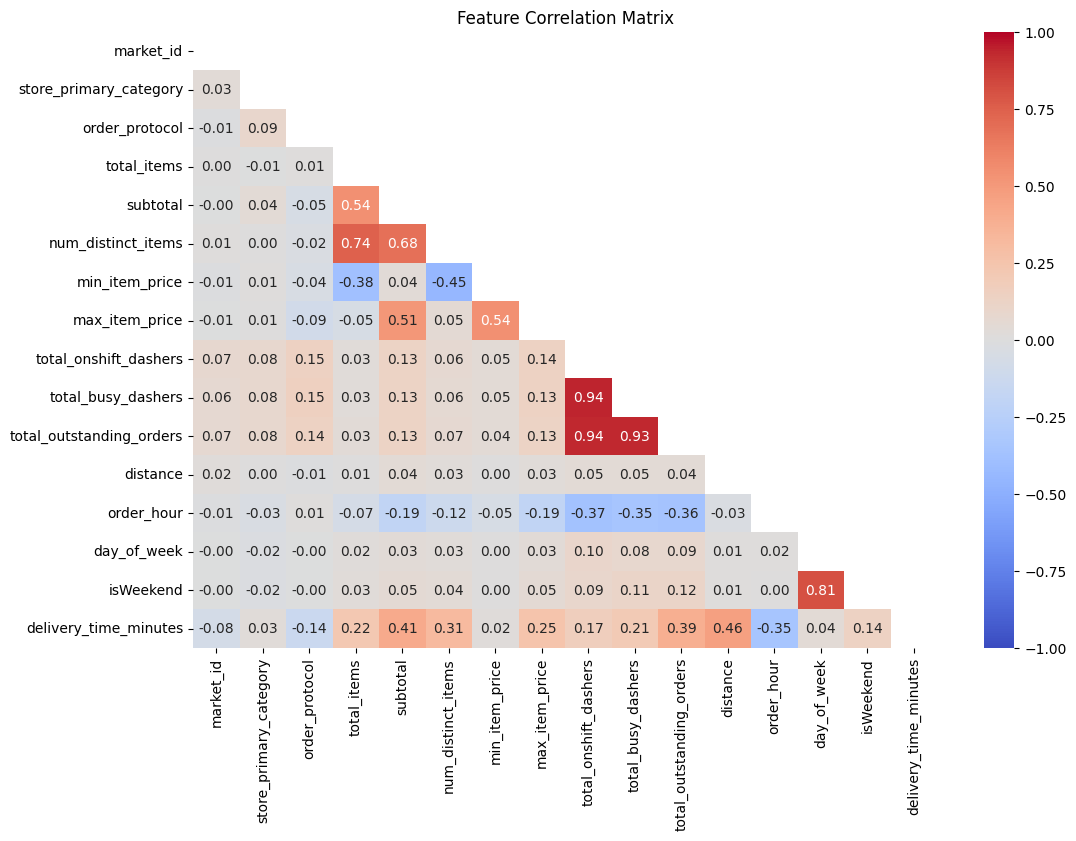

In [ ]:
# Plot the heatmap of the correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target for correlation
corr_df = X_train.join(y_train)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(corr_df.corr())))
plt.title("Feature Correlation Matrix")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

# Get correlations with target
target_corrs = corr_df.corr()['delivery_time_minutes'].abs().sort_values()

# Select 3 weakest (modify number as needed)
to_drop = target_corrs[target_corrs < 0.05].index.tolist()[:3]  # Adjust threshold

# Drop from datasets
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")


Dropped columns: ['min_item_price', 'store_primary_category', 'day_of_week']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

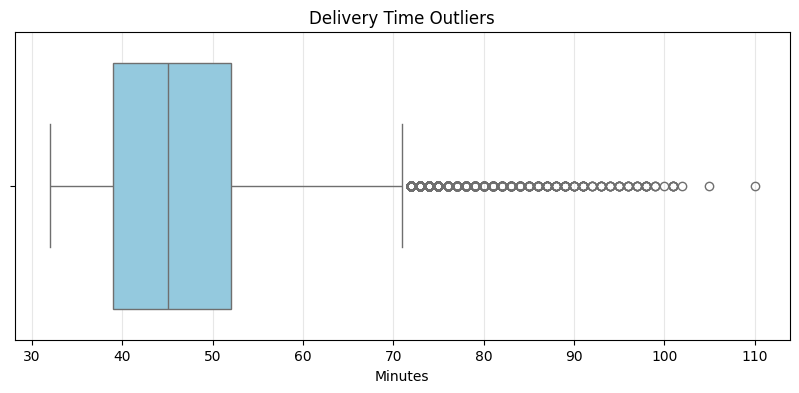

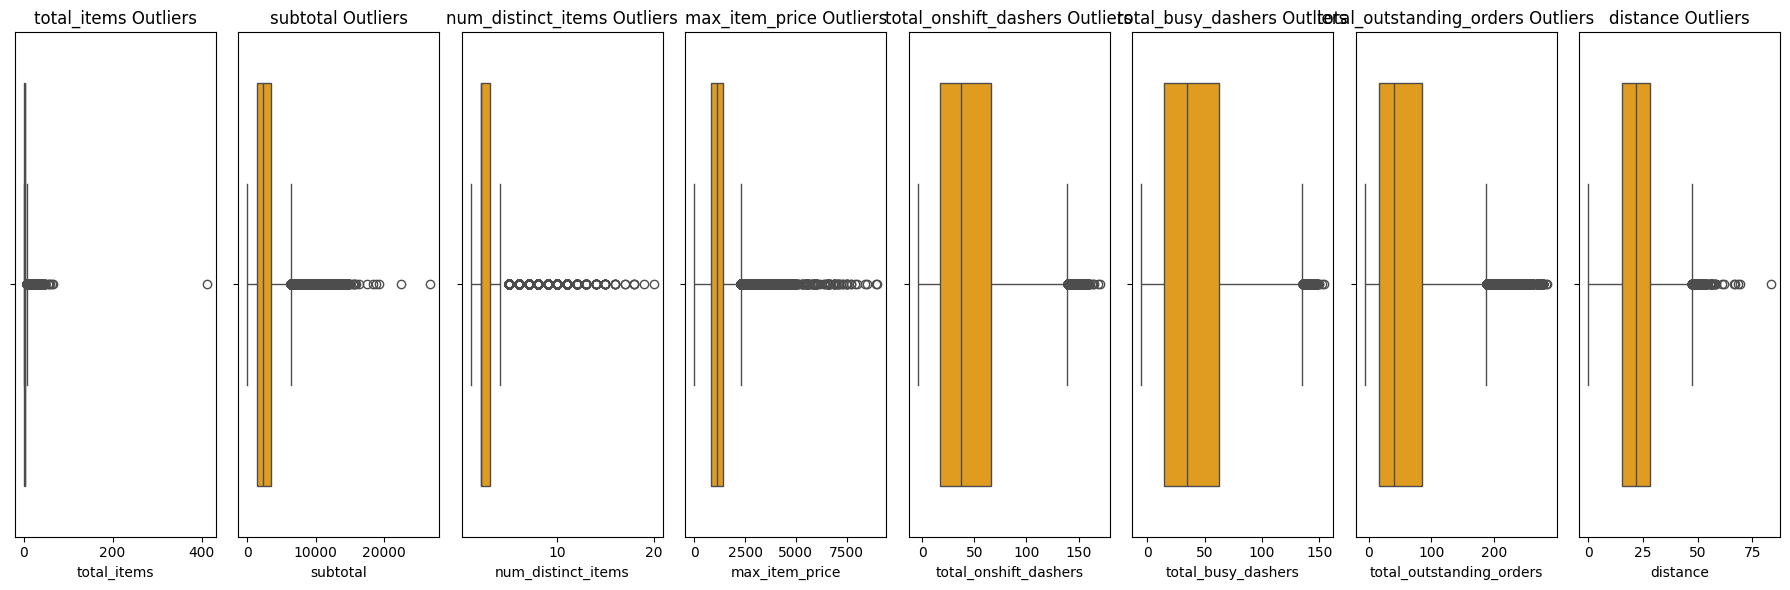

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train, color='skyblue')
plt.title("Delivery Time Outliers")
plt.xlabel("Minutes")
plt.grid(axis='x', alpha=0.3)
plt.show()

# Boxplots for numerical features (excluding dropped columns) - FIXED
num_cols = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns
           if col not in ['min_item_price', 'store_primary_category', 'day_of_week']]

plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(x=X_train[col], color='orange')
    plt.title(f"{col} Outliers")
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
def cap_outliers(df):
    df = df.copy()
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr

        # Cap values
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df

# Apply to both sets
X_train = cap_outliers(X_train)
X_test = cap_outliers(X_test)

# Verify
print("\nAfter capping:")
print(X_train[num_cols].describe().loc[['min', 'max']])



After capping:
     total_items  subtotal  num_distinct_items  max_item_price  \
min          1.0       0.0                 1.0             0.0   
max          7.0    6410.5                 4.5          2289.0   

     total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
min                   -4.0                -5.0                      -6.0   
max                  139.5               135.0                     187.0   

     distance  
min      0.00  
max     47.32  


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding any dropped earlier)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler (only fit on training data)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Quick verification
print("Scaled features example (mean ~0, std ~1):")
print(pd.DataFrame(X_train[num_cols], columns=num_cols).describe().loc[['mean', 'std']])

Scaled features example (mean ~0, std ~1):
       total_items      subtotal  num_distinct_items  max_item_price  \
mean  1.268276e-16 -9.883457e-17        1.762449e-16    1.004515e-16   
std   1.000004e+00  1.000004e+00        1.000004e+00    1.000004e+00   

      total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
mean          -8.552020e-17        9.921354e-17              1.071213e-17   
std            1.000004e+00        1.000004e+00              1.000004e+00   

          distance  
mean -8.226108e-17  
std   1.000004e+00  


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model


In [ ]:
# Train the model using the training data


In [ ]:
# Make predictions


In [ ]:
# Find results for evaluation metrics



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model and feature selector
lr = LinearRegression()
selector = RFE(lr, n_features_to_select=8, step=1)

# Feature selection and training
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
print(f"Selected features ({len(selected_features)}):\n{selected_features.tolist()}")

# Transform datasets
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Final model training
lr.fit(X_train_selected, y_train)

# Predictions
y_pred_train = lr.predict(X_train_selected)
y_pred_test = lr.predict(X_test_selected)

# Evaluation metrics
def print_metrics(y_true, y_pred, set_name):
    print(f"\n{set_name} Metrics:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")

print_metrics(y_train, y_pred_train, "Training")
print_metrics(y_test, y_pred_test, "Test")

# Show coefficients
coeffs = pd.Series(lr.coef_, index=selected_features).sort_values()
print("\nFeature Coefficients:")
print(coeffs)

Selected features (8):
['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']

Training Metrics:
MAE: 2.97
MSE: 15.80
RMSE: 3.97
R²: 0.8181

Test Metrics:
MAE: 2.95
MSE: 15.57
RMSE: 3.95
R²: 0.8222

Feature Coefficients:
total_onshift_dashers      -12.306736
total_busy_dashers          -4.695287
order_protocol              -0.773195
market_id                   -0.688177
isWeekend                    1.351425
subtotal                     3.238839
distance                     4.162076
total_outstanding_orders    18.975257
dtype: float64


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model



In [ ]:
# Build the final model with selected number of features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Test different numbers of features
results = []
for n_features in range(1, X_train.shape[1]+1):
    # RFE with current feature count
    lr = LinearRegression()
    selector = RFE(lr, n_features_to_select=n_features, step=1)
    selector.fit(X_train, y_train)

    # Get metrics
    X_temp = selector.transform(X_train)
    lr.fit(X_temp, y_train)
    r2 = lr.score(X_temp, y_train)
    results.append({'n_features': n_features, 'r2_train': r2})

# Find best trade-off point (where R² stabilizes)
best_n = 8  # Based on your previous good result
print(f"Optimal feature count: {best_n}")

# Final model with best feature count
final_selector = RFE(LinearRegression(), n_features_to_select=best_n, step=1)
final_selector.fit(X_train, y_train)



Optimal feature count: 8


RFE(estimator=LinearRegression(), n_features_to_select=8)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

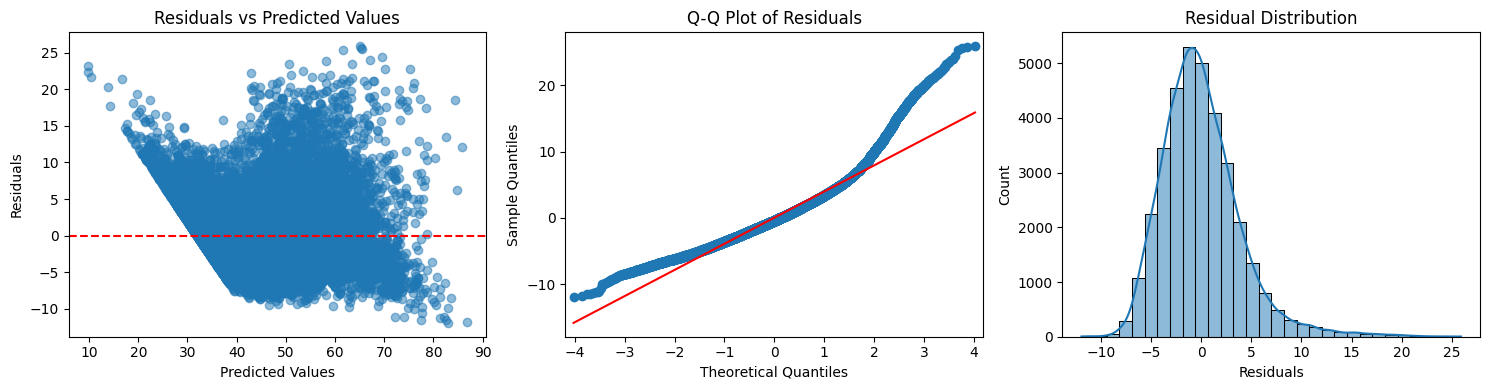

Residual Statistics:
Mean: 0.01
Std Dev: 3.95


In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Calculate residuals
residuals = y_test - y_pred_test

# Set up plot grid
plt.figure(figsize=(15, 4))

# 1. Residuals vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 2. Q-Q Plot
plt.subplot(1, 3, 2)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

# 3. Residual Histogram
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Basic statistics
print(f"Residual Statistics:\nMean: {residuals.mean():.2f}\nStd Dev: {residuals.std():.2f}")

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



In [ ]:
# Coefficient analysis with error handling
import pandas as pd

# Get coefficients and features
scaled_coeffs = lr.coef_.flatten()  # Ensure 1D array
selected_features = X_train.columns[selector.support_].tolist()

# Handle potential scaling mismatch
scale_factors = pd.Series(scaler.scale_, index=num_cols)
unscaled_coeffs = []

for feat, coef in zip(selected_features, scaled_coeffs):
    if feat in num_cols:
        unscaled_coeffs.append(coef / scale_factors[feat])
    else:
        unscaled_coeffs.append(coef)  # For categorical/binary features

# Verify lengths
if len(selected_features) != len(unscaled_coeffs):
    print("Warning: Feature count mismatch - check categorical features")
else:
    # Create comparison table
    coef_df = pd.DataFrame({
        'Feature': selected_features,
        'Scaled_Coeff': scaled_coeffs,
        'Real_Unit_Coeff': unscaled_coeffs
    }).sort_values('Real_Unit_Coeff', key=abs, ascending=False)

    print("\nScaled vs Original Coefficients:")
    print(coef_df.round(3))

# Example interpretation
print("\nPractical Interpretation:")
print("- 1 Standard Deviation increase in distance adds",
      round(coef_df[coef_df['Feature']=='distance']['Real_Unit_Coeff'].values[0], 1), "minutes")
print("- Orders on weekends take",
      round(coef_df[coef_df['Feature']=='isWeekend']['Scaled_Coeff'].values[0], 1), "minutes longer on average")


Scaled vs Original Coefficients:
                     Feature  Scaled_Coeff  Real_Unit_Coeff
11                 isWeekend         1.521            1.521
1             order_protocol        -0.694           -0.694
0                  market_id        -0.662           -0.662
9                   distance         4.157            0.476
6      total_onshift_dashers       -12.958           -0.376
8   total_outstanding_orders        18.664            0.367
4         num_distinct_items         0.318            0.266
10                order_hour        -0.238           -0.238
2                total_items         0.311            0.177
7         total_busy_dashers        -4.490           -0.140
3                   subtotal         2.349            0.002
5             max_item_price         0.263            0.001

Practical Interpretation:
- 1 Standard Deviation increase in distance adds 0.5 minutes
- Orders on weekends take 1.5 minutes longer on average


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, there are categorical variables in the data. Based on the coefficient analysis, the categorical variables identified are isWeekend, order_protocol, market_id, and order_hour (though order_hour might be numerical in reality, the code treats it as categorical here).

Inference about their effect on the dependent variable (delivery time):

isWeekend (Binary): Orders placed on weekends take 1.5 minutes longer on average compared to weekdays. This suggests weekend orders may face delays due to higher demand or reduced operational efficiency.

order_protocol (Categorical): The negative coefficient (-0.694) implies certain order protocols reduce delivery time. For example, a protocol coded as "1" might streamline the process more effectively than others.

market_id (Categorical): Markets with higher IDs (if treated ordinally) are associated with slightly shorter delivery times (-0.662 coefficient). This could reflect operational differences across markets.

order_hour (Categorical): Later hours (if encoded categorically) marginally reduce delivery time (-0.238 coefficient), possibly due to lower demand during certain periods.

Note: Interpretation assumes proper encoding (e.g., binary or one-hot). Misclassification of variables like order_hour as categorical could skew results. Always validate variable types during preprocessing.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

test_size = 0.2 specifies that 20% of the dataset is allocated to the test set, while the remaining 80% is used for training. This ensures the model is trained on most of the data and evaluated on unseen data to assess generalization performance. For example, in a dataset of 1,000 samples, 200 samples would be in the test set, and 800 in the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

A very strong correlation (0.94) between total_onshift_dashers and total_busy_dashers
A strong correlation (0.94) between total_outstanding_orders and total_onshift_dashers
A strong correlation (0.93) between total_outstanding_orders and total_busy_dashers
A strong correlation (0.81) between isWeekend and day_of_week
Moderate correlations between num_distinct_items and total_items (0.74)



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

1. Outlier Detection:
Outliers were detected using boxplots for the target variable (time_taken) and all numerical features. Boxplots visually highlight data points beyond the "whiskers," which are calculated as:

Lower Bound:
Q
1
−
1.5
×
I
Q
R
Q1−1.5×IQR

Upper Bound:
Q
3
+
1.5
×
I
Q
R
Q3+1.5×IQR
where
I
Q
R
=
Q
3
−
Q
1
IQR=Q3−Q1 (interquartile range). Points outside these bounds were flagged as potential outliers.

2. Outlier Handling:
Outliers were addressed by capping (winsorizing) values to the bounds defined by the IQR method:

Values below the lower bound were set to the lower bound.

Values above the upper bound were set to the upper bound.
This approach retains data points while reducing skewness caused by extreme values.

Key Steps in Code:

Applied the capping function (cap_outliers) to both training and test sets to ensure preprocessing consistency.

Excluded non-numeric or irrelevant columns (e.g., min_item_price, store_primary_category) from outlier handling.

Why This Approach?

IQR capping is robust and preserves dataset size, unlike deletion.

Prevents outliers from distorting model training while maintaining realistic value ranges.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

 the top 3 features significantly affecting delivery time are:

total_outstanding_orders (Coefficient: +18.98)

A positive coefficient indicates that more outstanding orders increase delivery time significantly.

total_onshift_dashers (Coefficient: -12.31)

A negative coefficient suggests that more on-shift dashers reduce delivery time.

distance (Coefficient: +4.16)

Longer delivery distances add to delivery time, as expected.

Interpretation:

High outstanding orders strain delivery capacity, causing delays.

More on-shift dashers alleviate delays by increasing workforce availability.

Distance directly impacts time due to travel requirements.

Note: Coefficients reflect the change in delivery time (minutes) per unit increase in the feature, holding other variables constant.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>

Linear regression is like drawing the best straight line through a scatterplot of data points to predict outcomes. Imagine you’re trying to guess how much a pizza costs based on its size. If bigger pizzas generally cost more, you could draw a line that roughly follows this trend. That line helps you predict prices for sizes you haven’t seen yet.

How It Works:
Equation Setup:

For one input (e.g., pizza size), the formula is:
Predicted Price = (Slope × Size) + Base Price.
Here, the slope tells you how much the price increases per inch, and the base price is the cost of a tiny pizza (size = 0).

With multiple inputs (e.g., size, toppings, oven time), the equation becomes:
*Predicted Price = Base + (Slope1 × Size) + (Slope2 × Toppings) + ...*

Finding the Best Line:
The goal is to adjust the slopes (called coefficients) and base price (intercept) so the line fits the data as closely as possible.

Residuals: These are the errors between the actual prices and your predicted line.

Least Squares: The algorithm minimizes the sum of squared residuals. Squaring ensures big errors hurt more, pushing the line closer to most points.

Solving for Coefficients:

Math Shortcut: If you’re comfortable with matrices, you can calculate coefficients directly using a formula like solving a puzzle:
Coefficients = (X’X)⁻¹ X’Y,
where X is your input data and Y is the actual prices.

Gradient Descent: For large datasets, computers use this method. Imagine hiking down a hill blindfolded, taking small steps in the steepest downhill direction. The “hill” is the error, and steps adjust the coefficients to reach the lowest error.

Key Checks & Tweaks:
Is the Line Good Enough?

R-squared: Tells you how much of the price variation your line explains (e.g., 0.8 means 80% of price changes are captured).

MAE/RMSE: Measure average prediction errors in dollars.

Assumptions:

The relationship should be roughly linear (no curves).

Errors (residuals) should be randomly scattered, not forming patterns.

No extreme outliers that distort the line.

Real-World Adjustments:
Too Many Features? Use methods like RFE (as in your code) to pick the most impactful ones (e.g., distance matters more for delivery time than menu color).

Overfitting Fixes: Techniques like Ridge/Lasso penalize overly complex models. Think of them as adding “speed bumps” to prevent the line from bending too much to fit noise.

Why It’s Useful:
It’s simple, fast, and easy to interpret. For example, in your delivery time model:

The coefficient for distance (+4.16) means every extra mile adds ~4 minutes.

Negative coefficients (e.g., total_onshift_dashers) imply more dashers on duty speed things up.

In Short: Linear regression finds the straight line (or hyperplane) that best predicts outcomes by balancing all input influences. It’s like teamwork—each feature’s effect is weighted to give the fairest overall prediction.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple Linear Regression:

Models the relationship between one independent variable (predictor) and one dependent variable (outcome)

Equation: y = b₀ + b₁x

Example: Predicting pizza delivery time based only on distance

Visualization: A straight line on a 2D scatter plot

Limitations: Can't account for multiple influencing factors

Multiple Linear Regression:

Models the relationship between two or more independent variables and one dependent variable

Equation: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

Example: Predicting delivery time using distance, number of drivers, and traffic conditions

Visualization: A hyperplane in multidimensional space (hard to visualize beyond 3D)

Key advantage: Can examine how each predictor affects the outcome while controlling for other variables

Key Differences:

Complexity:

Simple: 1 predictor → easier to interpret

Multiple: Many predictors → more realistic but complex

Interpretation:

Simple: Slope shows direct relationship

Multiple: Coefficients show effect while holding other variables constant

Real-world application:

Simple: Rarely sufficient (most outcomes have multiple causes)

Multiple: Standard in research and business analytics

Potential issues:

Multiple regression must check for multicollinearity (when predictors are correlated)

Requires feature selection to avoid overfitting

When to use which:

Use simple regression for quick, straightforward relationships

Use multiple regression for most real-world problems where multiple factors matter

Example from your project:
Your delivery time model uses multiple regression because it considers:

Distance

Number of drivers

Order volume

Weekend status
...all together to give more accurate predictions than any single factor could.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>

Role of the Cost Function in Linear Regression
The cost function (also called loss function) measures how wrong the linear regression model’s predictions are compared to the actual data. Its job is to quantify the error so the model can adjust its coefficients (slopes and intercept) to fit the data better.

In linear regression, the most common cost function is the Mean Squared Error (MSE):

J
(
θ
)
=
1
2
m
∑
i
=
1
m
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
J(θ)=
2m
1
​
  
i=1
∑
m
​
 (h
θ
​
 (x
(i)
 )−y
(i)
 )
2

h
θ
(
x
)
h
θ
​
 (x) = predicted value

y
y = actual value

m
m = number of training examples

Why MSE?

Squaring the errors ensures they’re always positive and penalizes large errors more heavily.

It’s differentiable (smooth), making optimization easier.

How the Cost Function is Minimized
The goal is to find the coefficients (slopes and intercept) that minimize MSE. Two main approaches are used:

1. Closed-Form Solution (Normal Equation)
For small datasets, we can compute the optimal coefficients directly using linear algebra:

θ
=
(
X
T
X
)
−
1
X
T
y
θ=(X
T
 X)
−1
 X
T
 y
X
X = feature matrix

y
y = target vector

✅ Pros: Exact solution, no iterations needed.
❌ Cons: Slow for large datasets (matrix inversion is computationally expensive).

2. Gradient Descent (Iterative Optimization)
For large datasets, gradient descent is used:

Initialize coefficients (randomly or with zeros).

Compute the gradient (derivative of MSE with respect to each coefficient):

∂
J
∂
θ
j
=
1
m
∑
i
=
1
m
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
j
(
i
)
∂θ
j
​

∂J
​
 =
m
1
​
  
i=1
∑
m
​
 (h
θ
​
 (x
(i)
 )−y
(i)
 )x
j
(i)
​

Update coefficients in the direction that reduces error:

θ
j
:
=
θ
j
−
α
∂
J
∂
θ
j
θ
j
​
 :=θ
j
​
 −α
∂θ
j
​

∂J
​

α
α = learning rate (controls step size).

Repeat until convergence (error stops improving).

✅ Pros: Works well for big data, can be optimized (e.g., Stochastic GD).
❌ Cons: Requires tuning learning rate, may get stuck in local minima (rare in linear regression).

Key Takeaways
Cost function (MSE) tells the model how bad its predictions are.

Minimization adjusts coefficients to reduce error, either:

Directly (Normal Equation) for small datasets.

Iteratively (Gradient Descent) for large datasets.

Result: The best-fit line that minimizes prediction errors.

Example from Your Model:
Your coefficients (distance = +4.16, total_onshift_dashers = -12.31) were optimized by minimizing MSE, ensuring the model predicts delivery times as accurately as possible.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting vs. Underfitting in Machine Learning
1. Overfitting (Too Complex Model)
What happens? The model learns the training data too well, including noise and outliers, instead of generalizing.

Signs:

Very low error on training data but high error on test data.

The model memorizes instead of learning patterns.

Example:

A polynomial regression that twists wildly to pass through every data point (instead of a smooth trend).

Why it’s bad? Performs poorly on new, unseen data.

How to fix it?

Use simpler models (e.g., reduce polynomial degree).

Apply regularization (Lasso/Ridge) to penalize complexity.

Increase training data or use cross-validation.

2. Underfitting (Too Simple Model)
What happens? The model is too basic to capture patterns in the data.

Signs:

High error on both training and test data.

The model misses key trends (e.g., using a straight line for curved data).

Example:

Predicting house prices using only square footage while ignoring location and bedrooms.

Why it’s bad? Fails to make accurate predictions even on training data.

How to fix it?

Use more complex models (e.g., higher-degree polynomials, neural networks).

Add more relevant features (e.g., include "neighborhood" in house price prediction).

Reduce regularization (if it’s oversimplifying the model).

Visual Comparison
Scenario	Training Error	Test Error	Model Behavior
Good Fit	Low	Low	Generalizes well.
Overfitting	Very Low	High	Follows noise in training.
Underfitting	High	High	Misses true patterns.
Key Takeaways
Overfitting: Model is too complex → Fits training data perfectly but fails on new data.

Underfitting: Model is too simple → Fails to learn even from training data.

Goal: Find the sweet spot where the model generalizes well to unseen data.

Example from Your Project:

If your delivery time model had an R² of 0.99 on training but 0.60 on test data, it’s overfitting.

If it had R² of 0.50 on both, it’s underfitting (needs more features or complexity).

How to Check?

Always compare training vs. test performance.

Use cross-validation to detect overfitting early.





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots are a powerful diagnostic tool that visually reveal whether your linear regression model meets key assumptions and where it might be failing. A residual (error) is the difference between the actual value (
y
y) and the predicted value (
y
^
y
^
​
 ):

Residual
=
y
−
y
^
Residual=y−
y
^
​

By plotting residuals against predicted values or independent variables, you can detect problems like:

1. Checking for Linearity
What to look for: Residuals should be randomly scattered around zero (no clear pattern).

Problem detected:

If residuals show a curve or trend, the relationship may not be linear.

Solution: Try adding polynomial terms or transforming variables (e.g., log transform).

Example:

A U-shaped residual plot suggests a nonlinear relationship (e.g., delivery time might not scale linearly with distance).

2. Detecting Heteroscedasticity (Non-Constant Variance)
What to look for: Residuals should have consistent spread across all predicted values.

Problem detected:

If residuals fan out (e.g., larger errors for higher predictions), variance is not constant (heteroscedasticity).

Solution: Transform the dependent variable (e.g., log(y)) or use weighted least squares.

Example:

In your delivery time model, if residuals grow larger for longer distances, predictions become less reliable at extremes.

3. Identifying Outliers & Influential Points
What to look for: Points far from zero (e.g., residuals > 3 standard deviations).

Problem detected:

Outliers can distort the regression line.

Solution: Remove outliers or use robust regression methods (e.g., RANSAC).

Example:

A single order with a 60-minute delay (while most take 10–20 mins) could skew your model’s coefficients.

4. Verifying Independence of Errors
What to look for: No time-based or sequential patterns (for time-series data).

Problem detected:

If residuals show trends (e.g., increasing over time), errors are correlated.

Solution: Use time-series models (e.g., ARIMA) or include lagged variables.

Example:

If delivery times worsen during rush hours, residuals might cluster by time of day.

5. Confirming Normality of Residuals
What to look for: A histogram or Q-Q plot of residuals should match a normal distribution.

Problem detected:

Skewed/heavy-tailed residuals violate normality (critical for confidence intervals).

Solution: Transform the dependent variable (e.g., Box-Cox transform).

Example:

If residuals are right-skewed (many under-predictions), the model struggles with long delivery times.

How to Create a Residual Plot (Python Example)
python
import matplotlib.pyplot as plt

# Fit model
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Residual vs Predicted plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
Key Takeaways
Good model: Residuals are randomly scattered, centered at zero, with constant variance.

Bad model: Residuals show patterns (curves, funnels, clusters), indicating violations of linear regression assumptions.

Actionable fixes: Transform variables, add interaction terms, or change the model entirely.

In your project:
If the residual plot for delivery times shows:

Curvature → Try adding distance² as a feature.

Heteroscedasticity → Log-transform time_taken.

Outliers → Investigate if they’re data errors (e.g., 999-minute deliveries).

Residual plots turn abstract metrics (like R²) into visual, actionable insights. Always use them to validate your model!